<a href="https://colab.research.google.com/github/bchanyoo/NLP/blob/main/NLP_Regular_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 정제(cleaning)과 정규화(normalization)

In [1]:
import re
import nltk

In [2]:
# 길이가 1~2인 단어들을 정규표현식을 이용하여 삭제하기.
# \W*는 비 단어 문자(구두점이나 공백과 같은)를 찾아냄
# \b는 단어 경계를 나타내며, 패턴이 완전한 단어에만 매치되도록 합니다.
# shortword.sub('', text)는 컴파일된 정규 표현식 패턴에 매치되는 부분을 찾아서 빈 문자열('')로 대체합니다.
# 따라서 짧은 단어는 모두 제거됩니다.

text = "I was wondering if anyone out there could enlighten me on this car."
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


### 어간 추출(stemming)과 표제어 추출(lemmatization)

In [4]:
# 표제어 = 기본 사전형 단어. 단어의 원형
# 어간 = 단어의 의미를 담는 핵심 부분
# 접사 = 단어의 추가적인 의미를 주는 부분.
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전', words)
print('표제어 추출 후 :',[lemmatizer.lemmatize(word) for word in words])

#ha, dy와 같은 적절하지 못한 단어 역시도 출력됨. 품사 정보를 알면 정확하게 출력이 가능.

[nltk_data] Downloading package wordnet to /root/nltk_data...


표제어 추출 전 ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


In [5]:
print(lemmatizer.lemmatize('dies', 'v'))
print(lemmatizer.lemmatize('watched', 'v'))
print(lemmatizer.lemmatize('has', 'v'))

die
watch
have


In [6]:
# stemming(어간 추출)

import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()
sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
tokenized_sentence = word_tokenize(sentence)

print('어간 추출 전', tokenized_sentence)
print('어간 추출 후', [stemmer.stem(word) for word in tokenized_sentence])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


어간 추출 전 ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후 ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


In [7]:
# Porter Stemmer, Lancaster Stemmer 비교해보기.

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('어간 추출 전', words)
print('Porter Stemmer 사용', [porter_stemmer.stem(w) for w in words])
print('Lancaster Stemmer 사용', [lancaster_stemmer.stem(w) for w in words])

어간 추출 전 ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
Porter Stemmer 사용 ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
Lancaster Stemmer 사용 ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


### Stopwords(불용어)

In [8]:
# Stopwords(불용어)

!pip install konlpy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.1 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# nltk의 불용어 확인
stop_words_list = stopwords.words('english')
print('불용어 개수', len(stop_words_list))
print('불용어 10개 출력', stop_words_list[:10])

불용어 개수 179
불용어 10개 출력 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [10]:
# 불용어 제거

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example)

result = []
for word in word_tokens:
  if word not in stop_words:
    result.append(word)

print('불용어 제거 전', word_tokens)
print('불용어 제거 후', result)

불용어 제거 전 ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


In [11]:
# 한국어에서의 불용어
# 불용어를 임의로 내가 선정한 후 토큰화 이후에 불용어 제거해보기.

okt = Okt()
example = '고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지'
stop_words = '를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는'

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전', word_tokens)
print('불용어 제거 후', result)

불용어 제거 전 ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지']
불용어 제거 후 ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지']


# 정규 표현식 문법

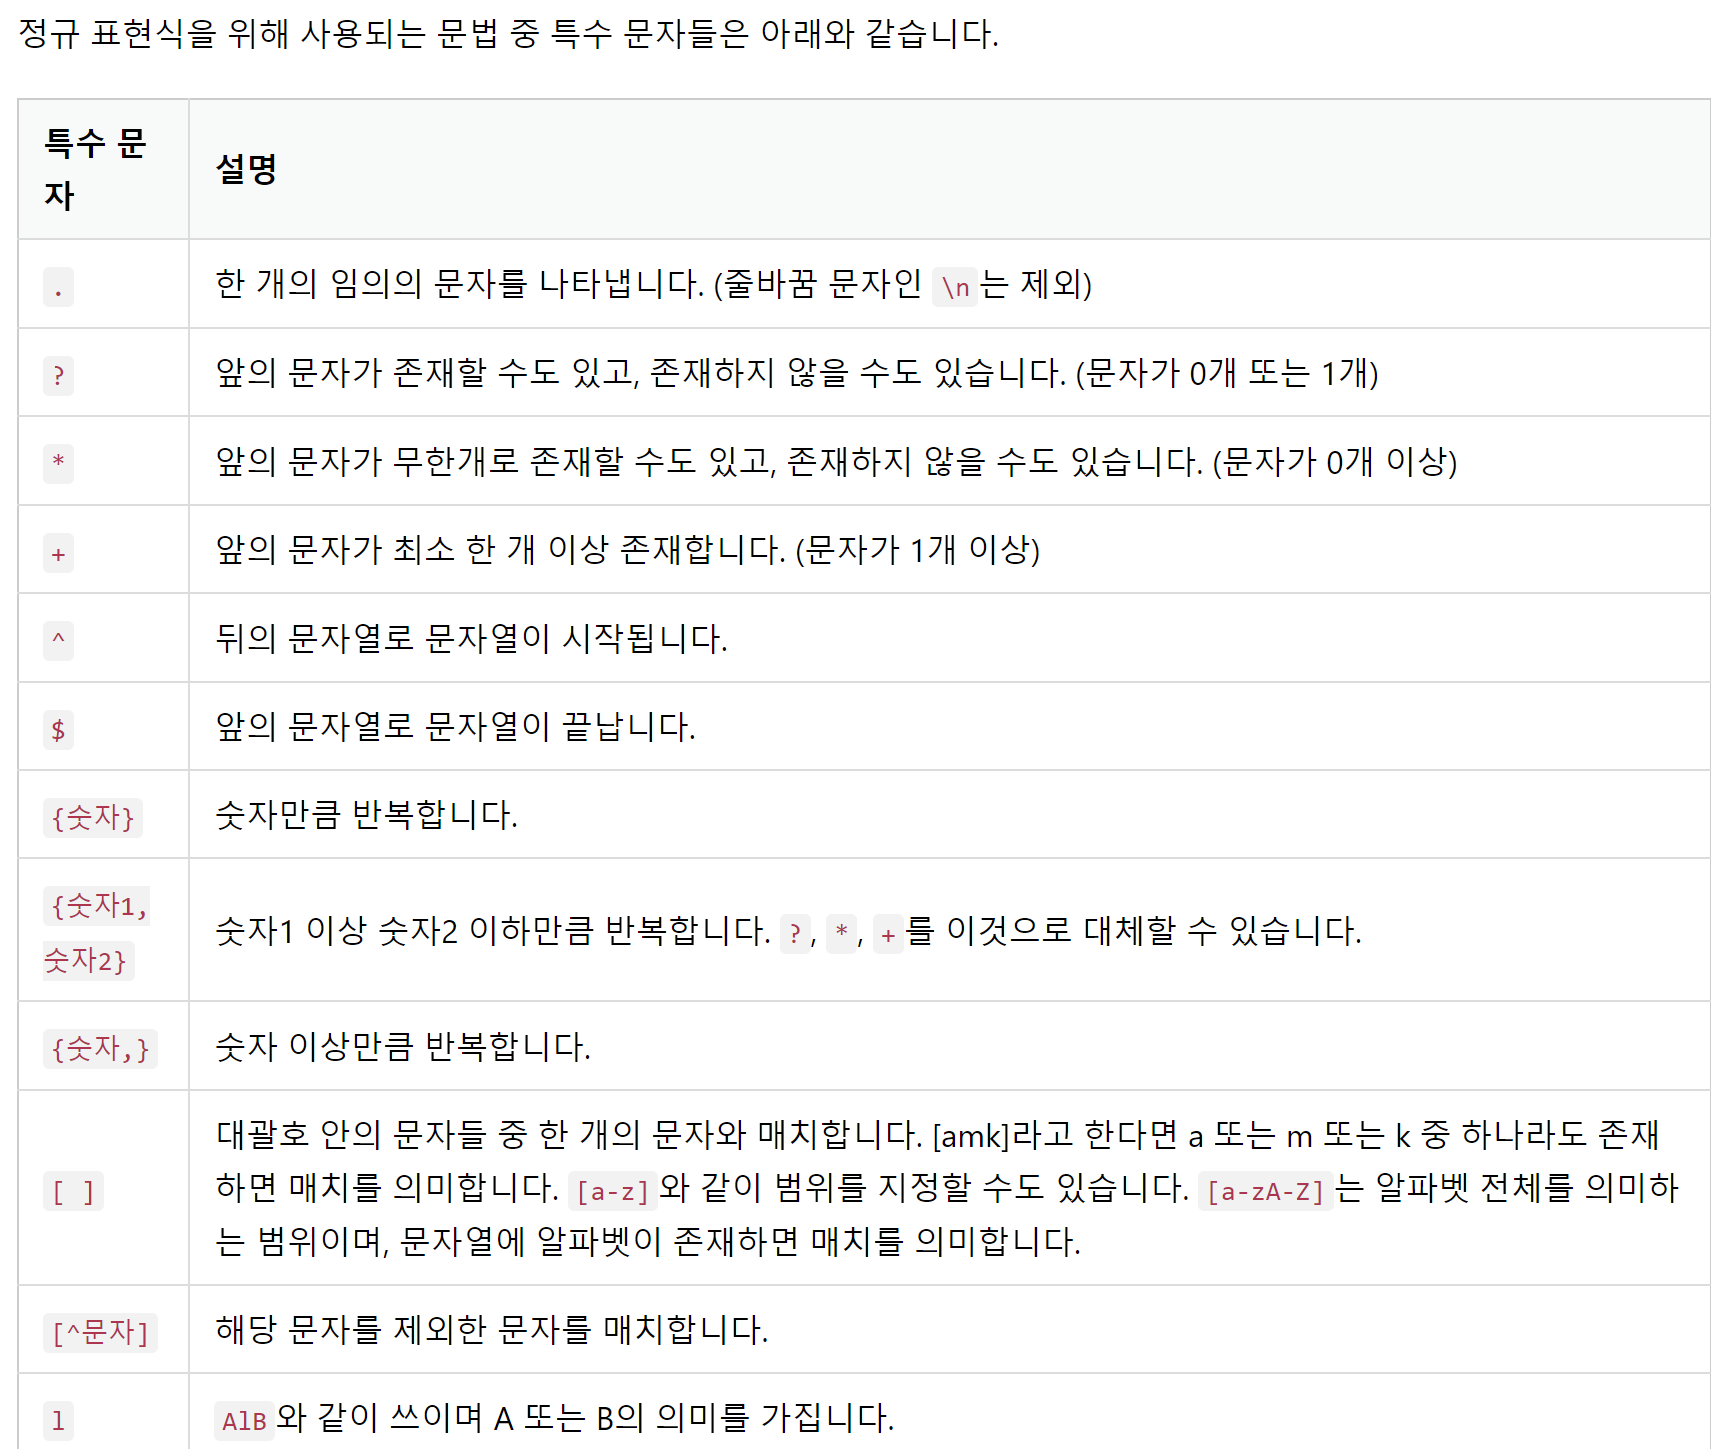

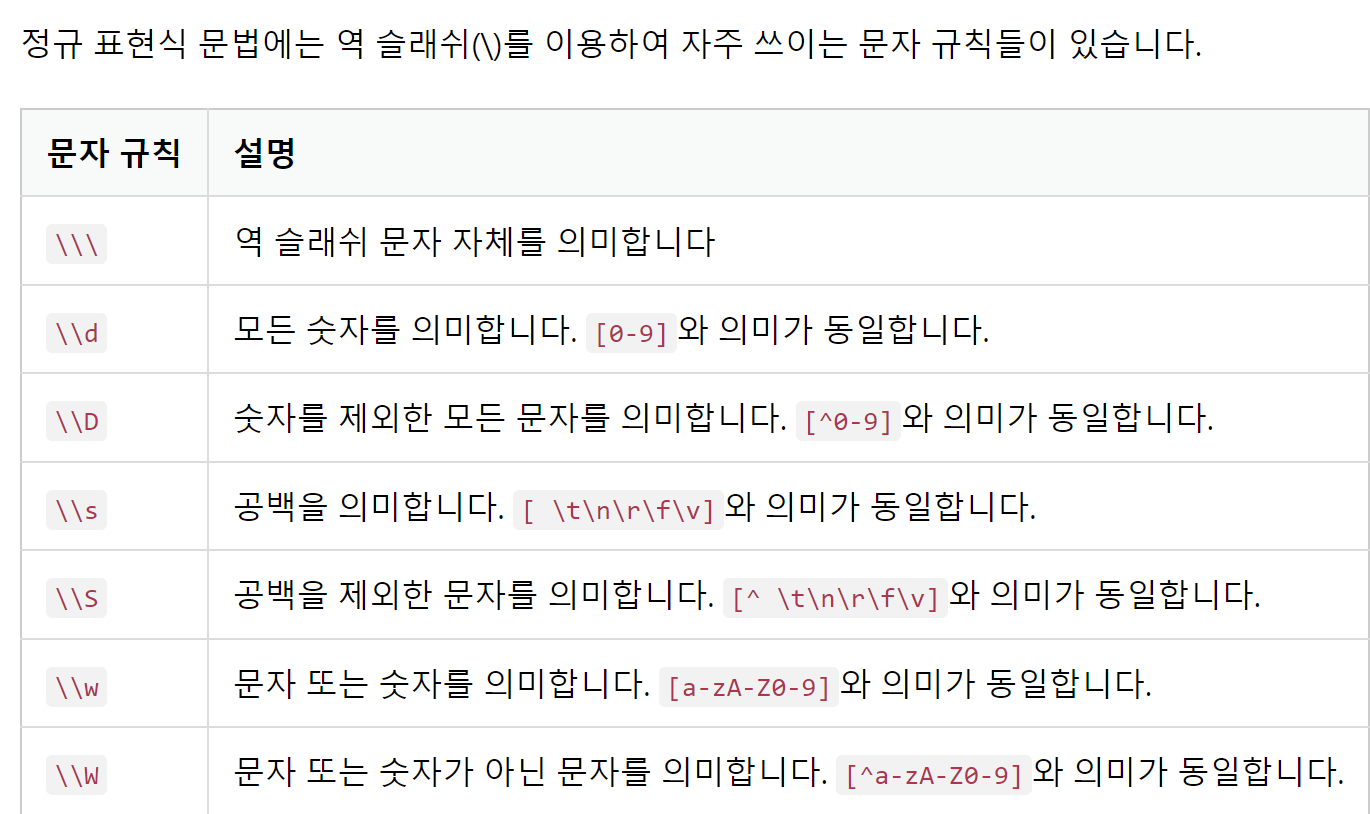

# 정규표현식 모듈 함수

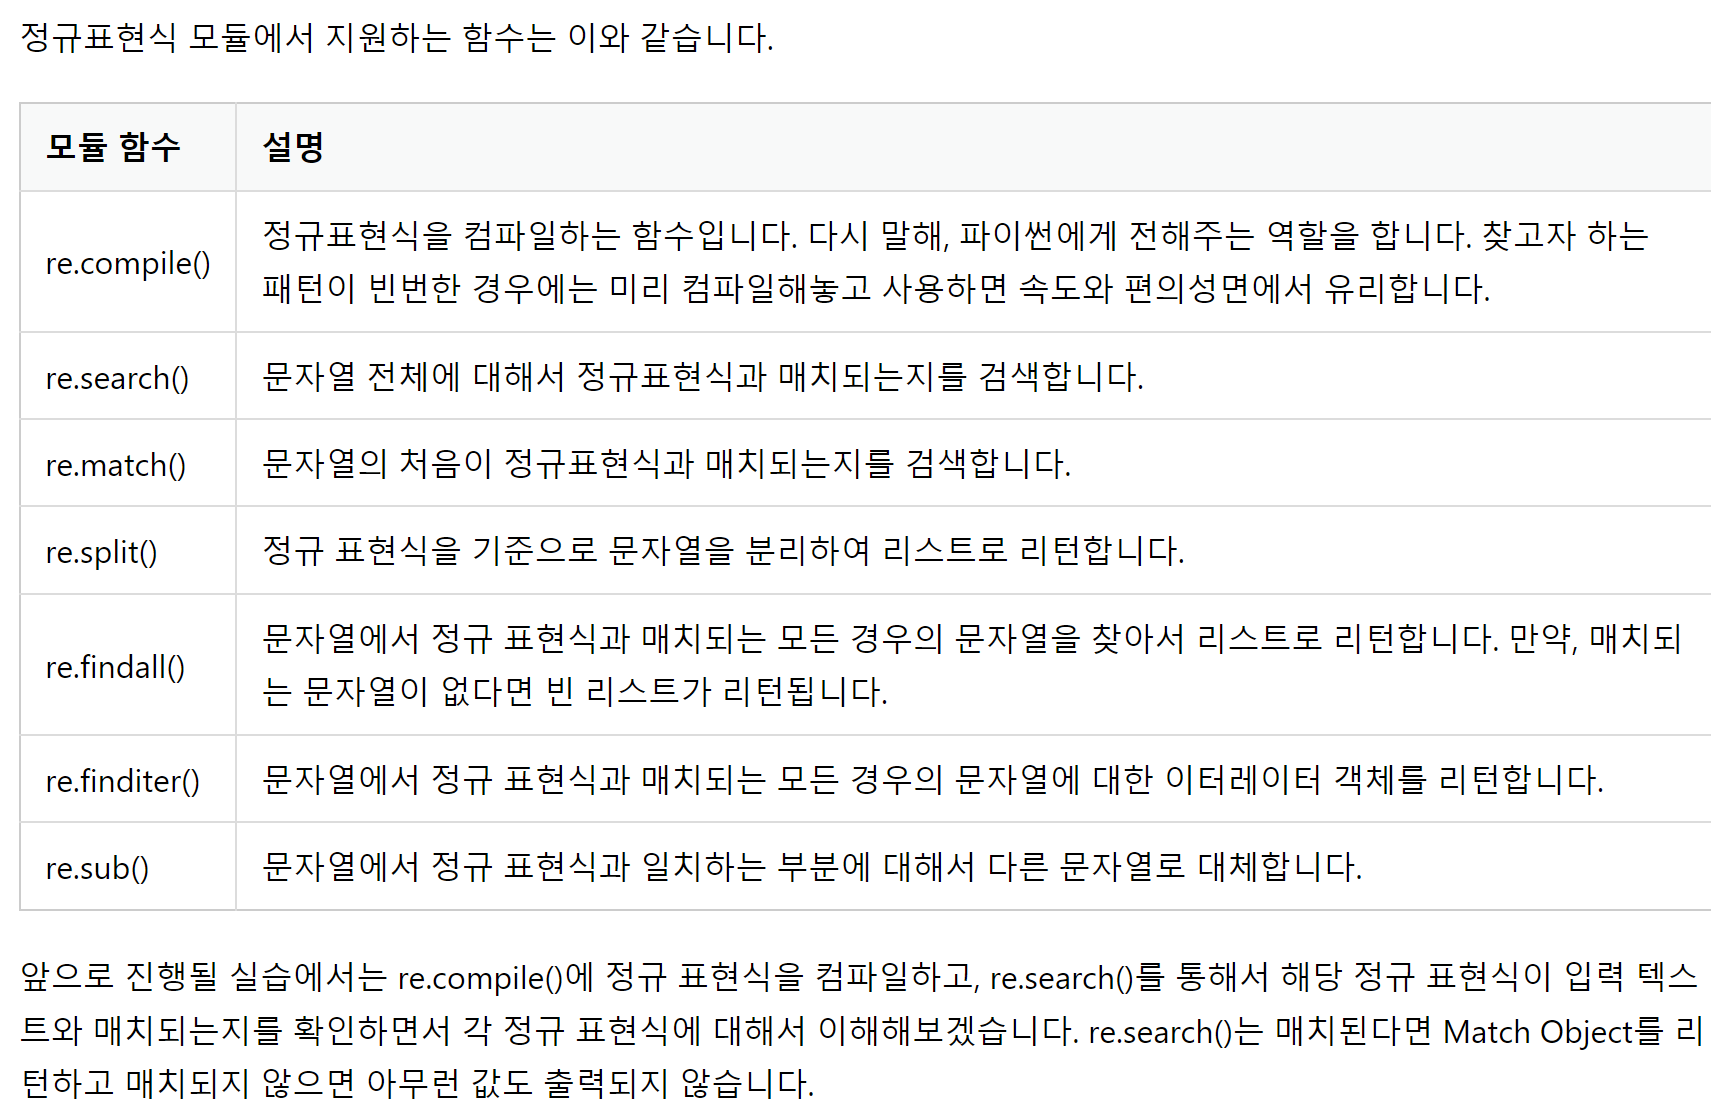

In [12]:
import re

In [13]:
# .
r = re.compile('a.c')
r.search('kkk')

In [14]:
r.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [15]:
# ?
r = re.compile('ab?c')

print(r.search('abc'))
print(r.search('ac'))
print(r.search('abbc')) # None

<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 2), match='ac'>
None


In [16]:
# *
r = re.compile('ab*c')

print(r.search('ac'))
print(r.search('abc'))
print(r.search('abbbbbc'))

<re.Match object; span=(0, 2), match='ac'>
<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 7), match='abbbbbc'>


In [17]:
# +
r = re.compile('ab+c')

print(r.search('ac')) #None
print(r.search('abc'))
print(r.search('abbbbbc'))

None
<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 7), match='abbbbbc'>


In [18]:
# ^
r = re.compile('^ab')

print(r.search('bbc')) #None
print(r.search('zab')) #None
print(r.search('abz'))

None
None
<re.Match object; span=(0, 2), match='ab'>


In [19]:
# {숫자}
r = re.compile('ab{2}c')

print(r.search('abc')) #None
print(r.search('abbbc')) #None
print(r.search('abbc'))

None
None
<re.Match object; span=(0, 4), match='abbc'>


In [27]:
# {숫자1, 숫자2}
r = re.compile('ab{2,8}c')

print(r.search('ac')) #b 0개, None
print(r.search('abc')) #b 1개, None
print(r.search('abbbbbbbbbc')) #b 9개, None

print(r.search('abbbc'))
print(r.search('abbbbbbbbc'))

None
None
None
<re.Match object; span=(0, 5), match='abbbc'>
<re.Match object; span=(0, 10), match='abbbbbbbbc'>


In [21]:
# {숫자,}
r = re.compile('ab{2,}c')

print(r.search('abc')) #None
print(r.search('abbc'))
print(r.search('abbbbbbbbbc'))

None
<re.Match object; span=(0, 4), match='abbc'>
<re.Match object; span=(0, 11), match='abbbbbbbbbc'>


In [33]:
# []

r = re.compile("[abc]") # [abc]는 [a-c]와 같다.

print(r.search("zzz")) #None
print(r.search("abcd"))
print(r.search("aerfs"))

r1 = re.compile("[a-z]") # a~z까지

print(r1.search("aBC"))

None
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='a'>


In [35]:
# [^문자]

r = re.compile('[^abc]')

print(r.search('efg'))
print(r.search('ab')) #None
print(r.search('abc')) #None
print(r.search('a')) #None

<re.Match object; span=(0, 1), match='e'>
None
None
None


In [36]:
# re.match() 함수
# 문자열의 '첫 부분'부터 정규 표현식과 매치되는지를 보는 함수

r = re.compile('ab.')
print(r.match('kkkabc')) # None, 서두에 없음.
print(r.match('abckkk'))

None
<re.Match object; span=(0, 3), match='abc'>


In [41]:
# re.split() 함수

#split(), 입력된 정규 표현식을 기준으로 문자열을 분리하여 '리스트'로 리턴해줌. 토큰화에 유용.

text = '사과 딸기 수박 메론 바나나'

print(re.split(' ', text))

text2 = '''사과
딸기
수박
메론
바나나'''

print(re.split('\n', text2))

['사과', '딸기', '수박', '메론', '바나나']
['사과', '딸기', '수박', '메론', '바나나']


In [43]:
# +를 기준으로 분리하기
text = '사과+딸기+수박+메론+바나나'
re.split('\+', text) #'+'는 정규표현식에서 갖는 의미가 있기 때문에 이스케이프 처리.

['사과', '딸기', '수박', '메론', '바나나']

In [48]:
# re.findall() 함수
# 매치되는 모든 '문자열'을 list로 return.
# 정규표현식으로 숫자를 의미하는 규칙의 예제

text = '''이름:김철수
전화번호:010 - 2134 - 1234
나이 : 30
성별:남'''

re.findall('\d+', text) # \d+에서 +가 빼면 숫자 개별 하나하나로 리턴이 됨. 정규표현식 +의 역할.

['010', '2134', '1234', '30']

In [53]:
# re.sub() 함수
# 정규 표현식 패턴과 일치하는 문자열을 다른 문자열로 대체할 수 있음.
# 문장에 각주 등과 같은 이유로 특수 문자가 섞여있는 경우에 특수 문자를 제거하고 싶다면 알파벳 외의 문자는 공백으로 처리하는 등의 용도

text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."
preprocessed_text = re.sub('[^a-zA-Z]', ' ', text) #알파벳을 제외한 모든 문자를 공백으로 대체.
print(preprocessed_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


In [59]:
# 정규표현식 텍스트 전처리 예제

text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

print(re.split('\s+', text)) #정규표현식 \s+ = 1개 이상의 공백 찾아내기.
print(re.findall('\d+', text)) #숫자 다 찾아내기
print(re.findall('[A-Z]', text)) #대문자 찾아내기.
print(re.findall('[A-Z]{4}', text)) #대문자 네개 연속 나오는 문자열 찾기
print(re.findall('[A-Z][a-z]+',text)) #대문자와 소문자가 섞인 문자(즉 이름) 찾기

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']
['100', '101', '102']
['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']
['PROF', 'STUD', 'STUD']
['John', 'James', 'Mac']


In [61]:
# RegexpTokenizer 사용해보기.
from nltk.tokenize import RegexpTokenizer
text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

tokenizer1 = RegexpTokenizer("[\w]+") #\w+는 문자or숫자가 1개 이상인 경우. []로 감싸 단어 토큰화를 수행.
tokenizer2 = RegexpTokenizer("\s+", gaps=True) #공백 기준 토큰화. gaps=True를 작성하지 않으면 토큰화의 결과는 공백임.

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
